
## 📦 Importing Required Libraries  
This section loads the essential libraries used for data analysis and visualization.

در این بخش کتابخانه‌های موردنیاز برای تحلیل داده و ترسیم نمودارها بارگذاری می‌شوند.


In [16]:
# Import necessary libraries for plotting and data processing
# Import kardan ketabkhanehaye zaroori baraye data analysis va plot keshidan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl


## 📄 Load Dataset  
We load the `FuelConsumption.csv` dataset which contains vehicle specs and emission data.

در این بخش دیتاست مصرف سوخت و گاز CO2 بارگذاری می‌شود.


In [17]:
# Load dataset from CSV file into a DataFrame
# Khandan file CSV va tabdil be DataFrame
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



## ✂️ Selecting Useful Features  
We select only the columns that are relevant for prediction, including engine size and fuel usage.

در این مرحله فقط ستون‌های مفید برای پیش‌بینی انتخاب می‌شوند.


In [18]:
# Select relevant columns for regression analysis
# Entekhab sotoon haye marbut baraye analysis va model
cf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244



## 📊 Visualizing Feature Relationships  
We draw a scatter plot to see if there's a correlation between engine size and CO2 emissions.

در این مرحله رابطه بین حجم موتور و تولید گاز CO2 را با نمودار می‌بینیم.


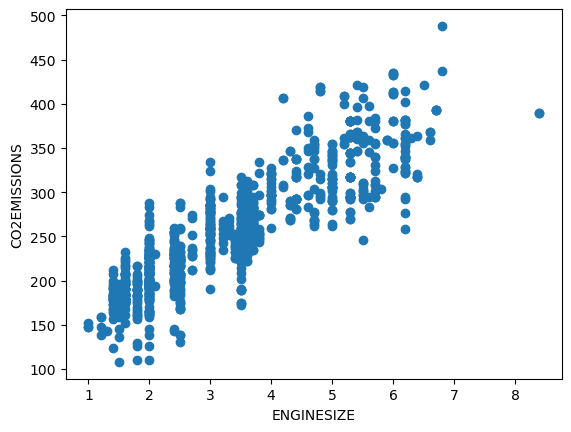

In [19]:
# Scatter plot to visualize relationship between engine size and CO2 emissions
# Tarh scatter baraye didan rabete bein ENGINESIZE va CO2EMISSIONS
plt.scatter(cf.ENGINESIZE,cf.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


## 🔀 Train/Test Split  
We randomly split the dataset into training and testing sets for model evaluation.

در این بخش دیتاست به دو قسمت آموزش و آزمون تقسیم می‌شود.


In [20]:
# Split dataset randomly into training and test sets
# Taghsim data be train va test baraye amoozesh va arzyabi
msk=np.random.rand(len(df))<0.8
train=cf[msk]
test=cf[~msk]


## 🧠 Model Training  
Here we train a multiple linear regression model using scikit-learn.

در این بخش یک مدل رگرسیون خطی چندمتغیره آموزش داده می‌شود.


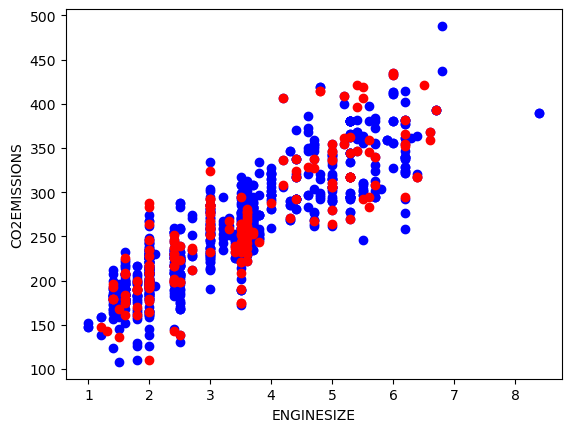

In [21]:
# Train the Linear Regression model using selected features
# Amoozesh model ravesh Linear Regression ba voroodi haye entekhab shodeh
fig=plt.figure()
a1=fig.add_subplot(111)
a1.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='b')
a1.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


## 📈 Model Coefficients  
We print the coefficients and intercept of the trained linear regression model.

در اینجا ضرایب مدل و مقدار ثابت آن را چاپ می‌کنیم.


In [22]:
# Display model coefficients and intercept
# Namayesh zarayeb (coefficients) va meqdar intercept model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x1=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y1=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x1, y1)
regr.intercept_
regr.coef_

array([[13.11998241,  6.57149907,  8.83837224]])


## 📉 Regression Line Visualization  
We plot the training points and the regression line that fits the data.

در این مرحله داده‌های آموزش و خط رگرسیون روی آن ترسیم می‌شوند.


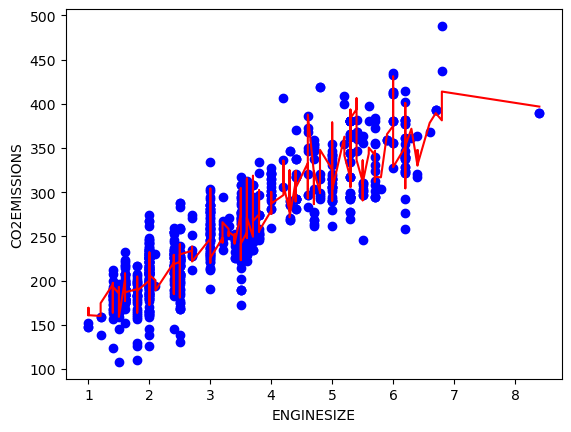

In [ ]:
# Plot training data and draw regression line over it
# Plot kardan data-haye train va keshidan khate regresion roosh
import matplotlib.pyplot as plt

# توجه: train['COLUMN_NAME'] یک بردار (سری) است، نه یک عدد
y_line = regr.intercept_[0] + \
         regr.coef_[0][0] * train['ENGINESIZE'] + \
         regr.coef_[0][1] * train['CYLINDERS'] + \
         regr.coef_[0][2] * train['FUELCONSUMPTION_COMB']

plot_data = pd.DataFrame({'ENGINESIZE': train.ENGINESIZE, 'Y_LINE': y_line})
plot_data_sorted = plot_data.sort_values(by='ENGINESIZE')

# رسم نقاط واقعی
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

# رسم خط محاسبه شده
plt.plot(plot_data_sorted['ENGINESIZE'], plot_data_sorted['Y_LINE'], color='red')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


## 📏 Model Evaluation  
The model is tested on unseen data and evaluated using R² score.

مدل با داده‌های تست ارزیابی شده و دقت آن با معیار R² سنجیده می‌شود.


In [ ]:
# Predict test data and evaluate model using R-squared score
# Pishbini rooye test va arzyabi ba estefadeh az meyare R2
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
r2_score(test_y,test_y_)

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8437557932597387